# configuration file testing and setup

In [ ]:
import new_cfg
import ConfigParser
config = ConfigParser.ConfigParser()

In [ ]:
reload(new_cfg)
rc_fh = new_cfg.new_rc()

In [ ]:
config.read(rc_fh)
for sec in config.sections():
    print '[' + sec + ']'
    for item in config.items(sec):
        print item[0], '=', item[1]
    print ''

# skysearch_lib testing

In [ ]:
import skysearch_lib as ss_lib
import ConfigParser
#import ConfigParser

In [ ]:
config = ConfigParser.ConfigParser()
config.read(ss_lib.sortout_rcfile())
for sec in config.sections():
    print '[' + sec + ']'
    for item in config.items(sec):
        print item[0], '=', item[1]
    print ''

In [79]:
np.concatenate((np.zeros((10,10,2)), np.zeros((10,10,1))), axis=2)

array([[[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0., 

# file system support testing

In [ ]:
import os

In [ ]:
# string path to this (current) directory
curdir_path = os.path.abspath(os.path.curdir)

In [ ]:
# parent directory path and current directory name
pardir_path, curdir_name = os.path.split(curdir_path)

In [ ]:
# parent directory name
pardir_name = os.path.split(pardir_path)[1]

In [ ]:
# list of files in this directory with .cfg ext
[f for f in os.listdir(os.path.abspath(os.path.curdir)) if os.path.splitext(f)[1] == '.cfg']

In [ ]:
dmpc = '4.0'
filter_type = 'h158'
halo ='halo02'
file_type = 'grid'
ext = 'npy'

In [ ]:
'_'.join([halo, dmpc, filter_type, file_type]) + os.path.extsep + ext

In [ ]:
'_'.join([halo, dmpc, filter_type])#, file_type])

# annuluar and radial segment limits

In [93]:
import os
import numpy as np
import skysearch_lib as ss_lib
from astropy.table import Table
import random

def fix_rslice(grid, r=4):
    phi_slice = np.zeros((601, 601, 1))
    grid = np.concatenate((grid, phi_slice), axis=2)

    center = 300
    grid = grid
    for i in range(grid.shape[0]):
        for q in range(grid.shape[1]):
            value = np.sqrt(np.square(i - center) + np.square(q - center))
            try:
                grid[i, q, r] = value
                grid[i, q, 5] = np.arctan2(i - 300, q - 300)
            except IndexError as e:
                #print i + y_offset, q + x_offset, e
                pass
    grid[:, :, 5] = np.rad2deg(grid[:, :, 5], grid[:, :, 5]) + 180.0
    return grid

In [ ]:
prefix = os.path.sep.join(ss_lib.table_dir.split(os.path.sep)[:3])
import skysurvey

In [ ]:
print table

## - feature finding

In [163]:
from matplotlib import pyplot as plt
from astropy.table import Table
import os
import skysurvey
import numpy as np
from random import sample

In [164]:
# params 
r_0 = 10
r_1 = 275
r_step = 1
r_scale = 0.05
deg_0 = -np.pi
deg_1 = np.pi
deg_step = 360 * 1.5

# make the arrays
radii = range(r_0, r_1, r_step)
annulii, annulus_step = np.linspace(deg_0, deg_1, deg_step, retstep=True, dtype=np.float16) 

In [165]:
# make an output table
output_colums = ['radius', 'r0', 'r1', 'halo',
                 'xbox_min', 'xbox_mean', 'xbox_max', 
                 'n_features', 'sat_purity', 'n_stars', 
                 'name0', 'name1', 'name2']
output_dtyps = ['f', 'f', 'f', 'S10',
                 'f', 'f', 'f', 
                 'i', 'f', 'i', 
                 'f', 'f', 'f']
record_table = Table(names=output_colums, dtype=output_dtyps)
record_table.pprint(max_width=200)

radius  r0  r1 halo xbox_min xbox_mean xbox_max n_features sat_purity n_stars name0 name1 name2
------ --- --- ---- -------- --------- -------- ---------- ---------- ------- ----- ----- -----


In [166]:
# Load halo grid into mem
grid_number = 3
grid_dir_path = os.path.join(skysurvey.grid_dir, '601')
grids = [fh for fh in os.listdir(grid_dir_path) if fh.endswith('npy')]
grid_fh = os.path.join(grid_dir_path, grids[grid_number])
grid = fix_rslice(np.load(grid_fh))

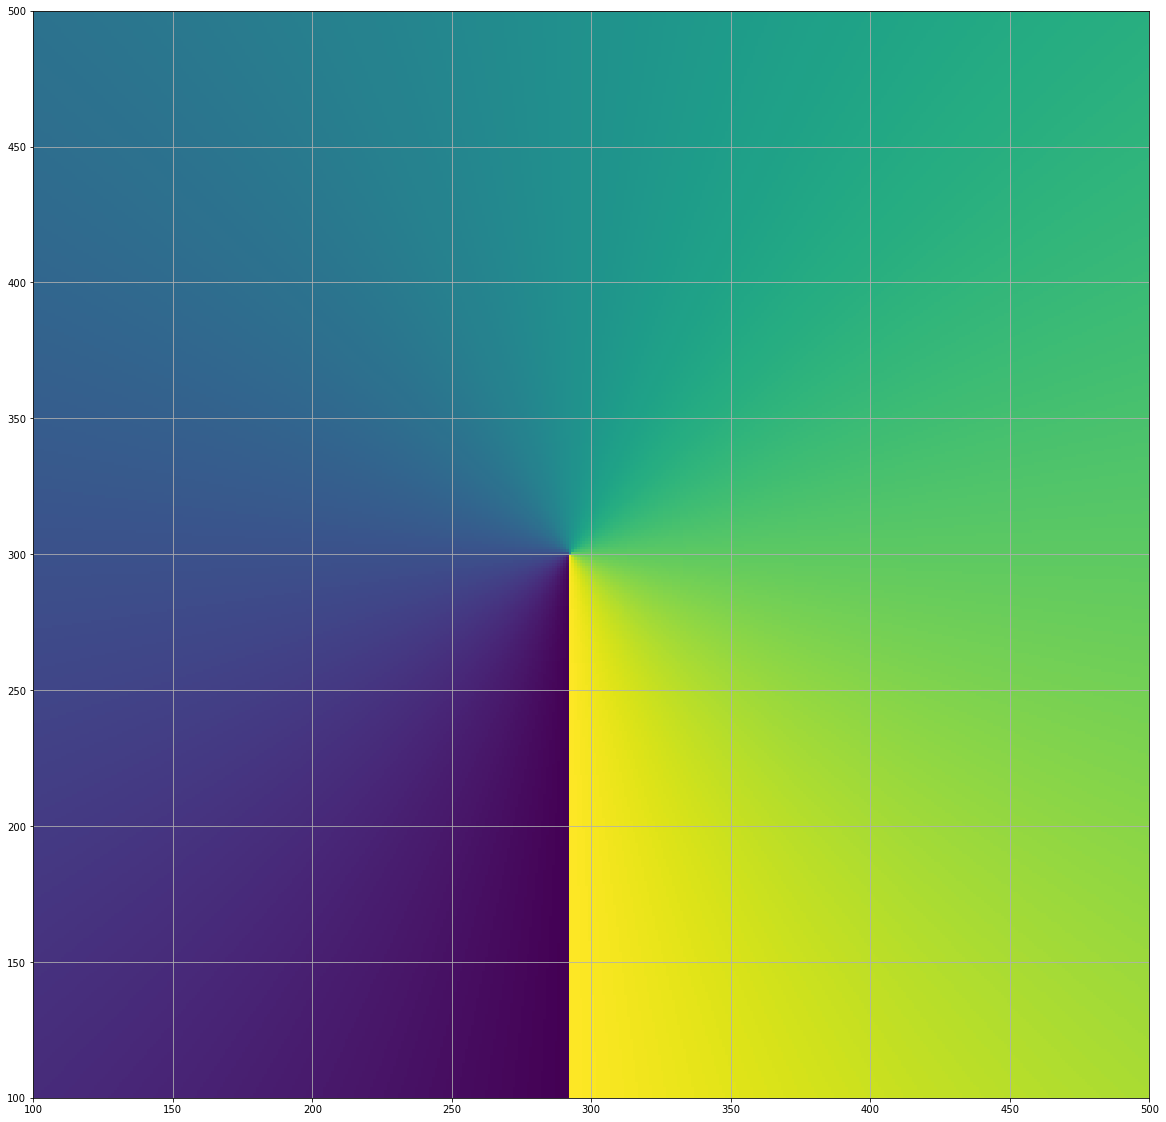

In [95]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)

ax.pcolormesh(grid[8:, :, 5].T)#, cmap=plt.cm.bone_r, vmin=0.0, vmax=3.6)
ax.set_xlim([100, 500])
ax.set_ylim([100, 500])
ax.axes.grid()

plt.show()

In [167]:
# Load halo table into mem
table_number = 0
table_dir_path = os.path.join(skysurvey.table_dir, 'merged_tables')
tables = [fh for fh in os.listdir(table_dir_path) if fh.endswith('hdf5')]
table_fh = os.path.join(table_dir_path, tables[table_number])
table = Table.read(table_fh, format='hdf5', path='data')
print table.meta['halo']

halo02


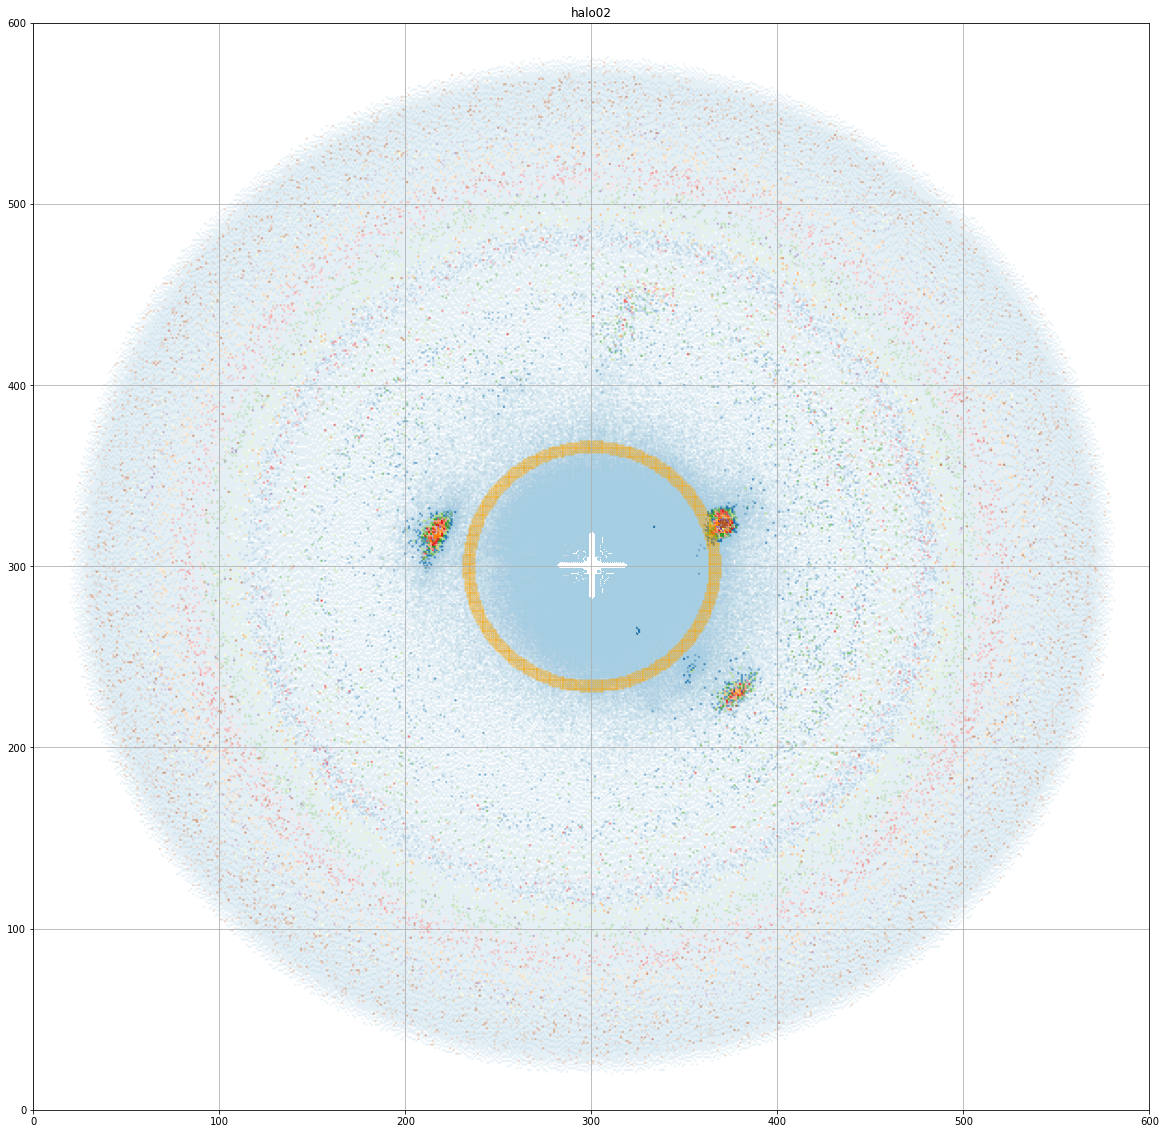

In [148]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)

_x = table['x_int'][::10]
_y = table['y_int'][::10]
_c = table['Xbox'][::10]

ax.scatter(_x, _y, s=10, alpha=.15, marker='.', cmap=plt.cm.Paired, c=_c, vmin=1.0, vmax=10.0)
ax.scatter(rlims[0], rlims[1], s=10, alpha=.3, marker='.', color='orange')

ax.set_title(table.meta['halo'])
ax.set_xlim([0, 600])
ax.set_ylim([0, 600])
ax.axes.grid()

plt.show()

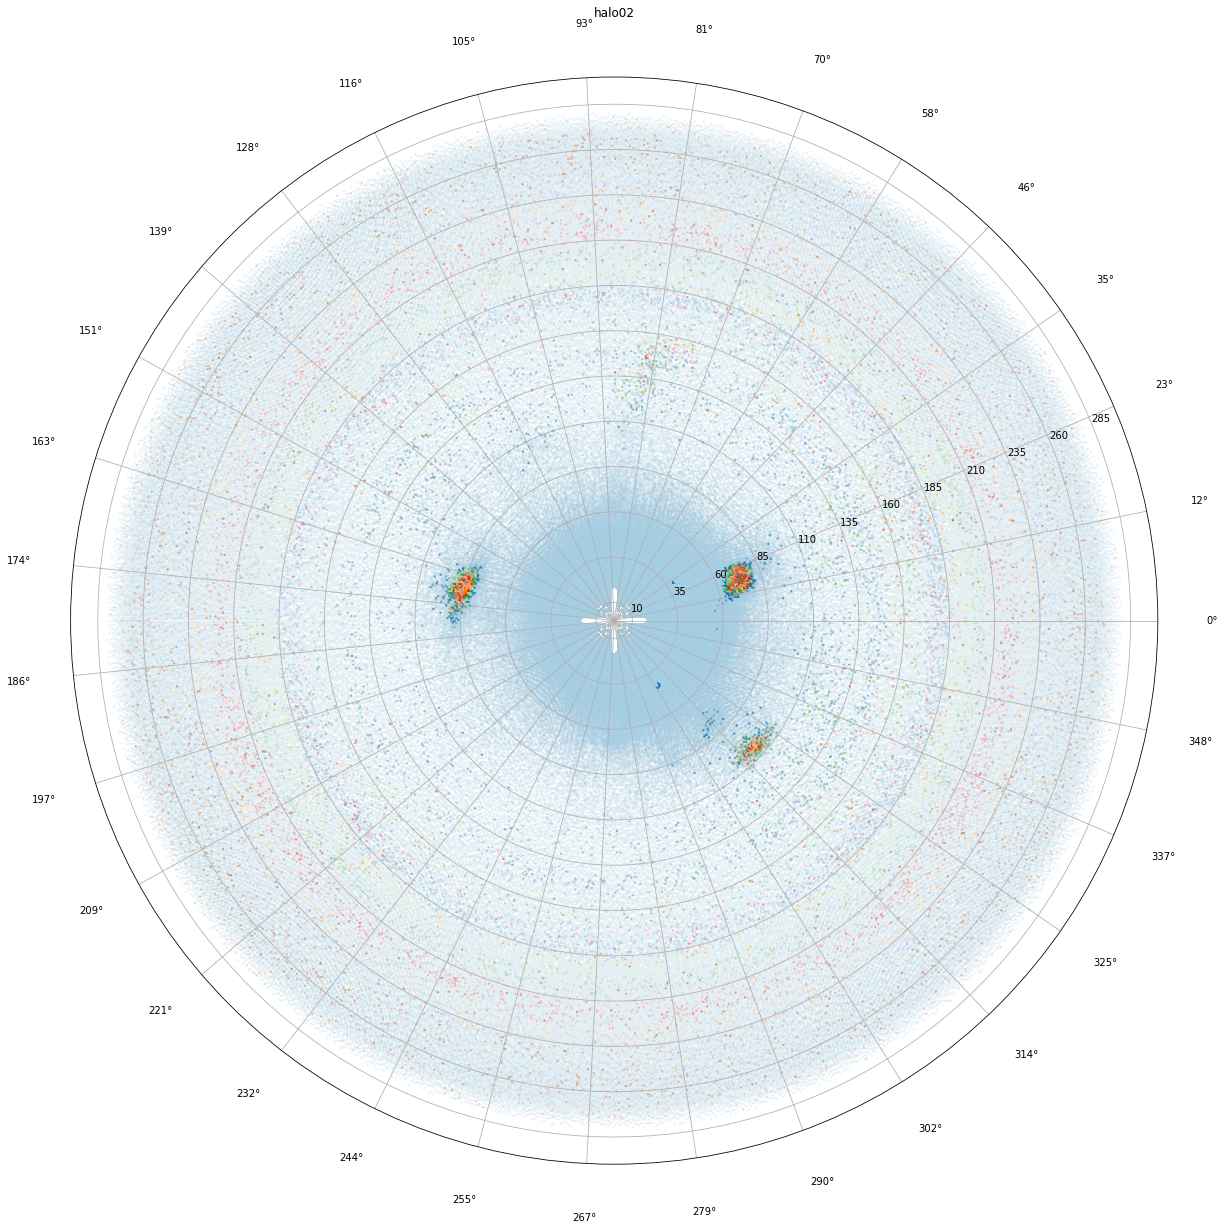

In [149]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='polar')

_x = table['Rads'][::10]
_y = table['Phi'][::10]
_c = table['Xbox'][::10]
ax.scatter(_y, _x, s=10, alpha=.15, marker='.', cmap=plt.cm.Paired, c=_c, vmin=1.0, vmax=10.0)

ax.set_thetagrids(np.linspace(0.0, 360.0, 32)[:-1])
ax.set_rgrids(range(10, 300, 25))
ax.set_title(table.meta['halo'])
ax.set_ylim([0, 300])

plt.show()

In [146]:
# Do this with each radial segment for each radius.
kpc_arr, deg_arr = kpc_deg_arrs()
# -- Sort out all the boxes for this annulus--
# 1. find the limits for this annulus.
_r = radii[56]
_region = _r * r_scale
_r_strt = _r - _region
_r_stop = _r + _region

# 2. Find the boxes for this annulus.
rlims = np.nonzero(
    np.logical_and(
        kpc_arr >= _r_strt, 
        kpc_arr < _r_stop))

mu = grid[rlims[0], rlims[1], 0].mean()
#xbox = (grid[rlims[0], rlims[1], 0] - mu) / mu
# 3. Find the contrast density value for this annulus

# -- Evaluate --
# for each region segment:
xbox_min = 5.0
feature_id = 0
region = []
feature_dict = {}
have_feature = False
steps_since_last = 0
annulus_set = set()
for _deg in annulii:
    
    _deg0 = _deg
    _deg1 = _deg + annulus_step

    alims = np.nonzero(
        np.logical_and(
            np.logical_and(
                grid[:, :, 5] >= _deg0 - 0.2,
                grid[:, :, 5] < _deg1) + 0.8,
            np.logical_and(
                grid[:, :, 4] >= _r_strt, 
                grid[:, :, 4] < _r_stop)))


    boxes = (grid[alims] - mu) / mu
    save_idx = np.nonzero(boxes > xbox_min)
    boxes = boxes[save_idx]
    n_boxes = len(boxes)
    if n_boxes:
    
        if have_feature:
            region.append(save_idx)
        else:
            region = [save_idx]
        have_feature = True
        
    else:
        if have_feature:
            feature_id += 1
            feature_dict[feature_id] = region
            steps_since_last = 0
        else:
            steps_since_last += 1
        have_feature = False
        

print feature_dict.keys()

[]


In [143]:
alims

(array([231, 231, 231, ..., 369, 369, 369], dtype=int64),
 array([294, 295, 296, ..., 304, 305, 306], dtype=int64))

In [118]:

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
for x,y in cur_set:
    ax.scatter(x, y, s=10, alpha=.15, marker='.', color='red')

ax.set_xlim([175, 425])
ax.set_ylim(ax.get_xlim())
ax.axes.grid()

plt.show()

8

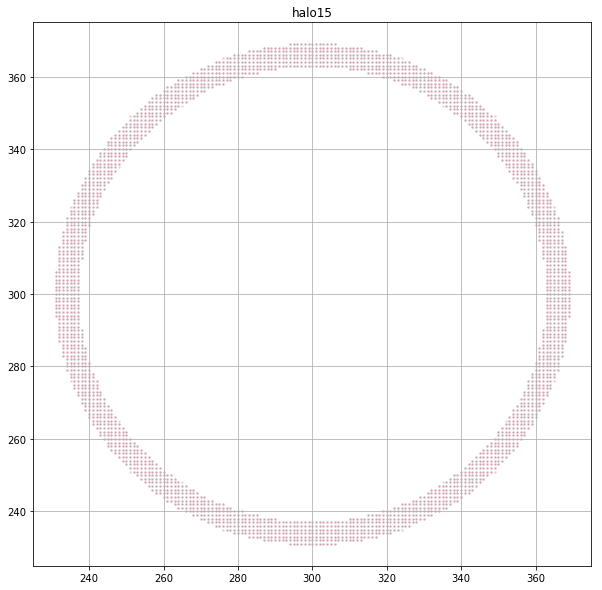

In [145]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.scatter(rlims[1], rlims[0], s=10, alpha=.15, marker='.')
ax.scatter(alims[1], alims[0], s=10, alpha=.15, marker='.', color='red')

ax.set_title(table.meta['halo'])
ax.set_xlim([225, 375])
ax.set_ylim(ax.get_xlim())
ax.axes.grid()

plt.show()

In [169]:
for _deg in [annulii[287]]:
    
    _deg0 = _deg
    _deg1 = _deg + annulus_step

## get the search grid setup

In [187]:
rlims = np.nonzero(
    np.logical_and(
        table['Rads'] >= _r_strt, 
        table['Rads'] < _r_stop))

alims = np.nonzero(
    np.logical_and(
        np.logical_and(
            table['Phi'] >= _deg0 ,
            table['Phi'] < _deg1),
        np.logical_and(
            table['Rads'] >= _r_strt, 
            table['Rads'] < _r_stop)))

In [182]:
table[alims]['Rads'].max()

69

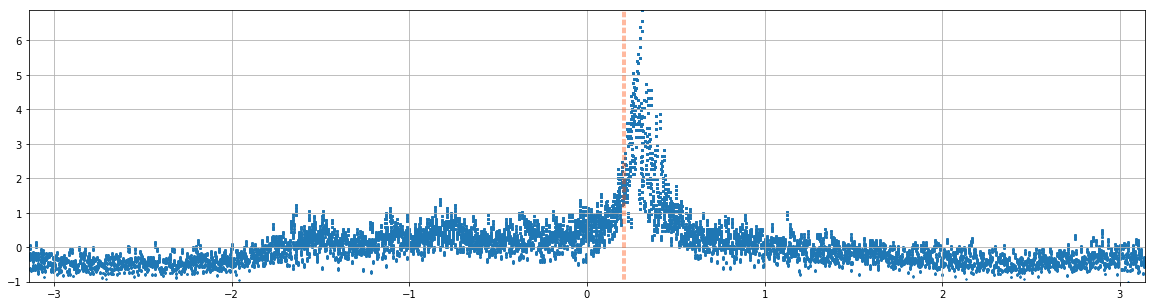

In [204]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)

ax.scatter(table[rlims]['Phi'], table[rlims]['Xbox'], s=1)

ax.vlines((_deg0, _deg1), -1e3, 1e3, color='orangered', alpha=.5, linestyle='dashed')
ax.set_xlim([-np.pi, np.pi])
ax.set_ylim([table[rlims]['Xbox'].min(), table[rlims]['Xbox'].max()])
ax.axes.grid()

plt.show()

In [203]:
table[rlims]['Xbox'].max()

6.8828